
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_1/Session_1_Linear_Regression_exercise_NOTSOLVED.ipynb)


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



# Answers To Multiple Choice Questions:

1. (c)
2. (d)
3. (b)
4. (b)
5. (a)
6. (c)
7. (c)
8. (b)
9. (a), (b), (d), ()e
10. (d)
11. (a)
12. (a)
13. No Question
14. (c)
15. (a)

### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
# Within IPython notebook, add multiple print capabilities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [ ]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



**Write your answer here:**

For the purpose of this exercise I am going to drop two variables from my dataset, Email and Avatar (Color). These two variables just from common sense won't have any relevance in determining how long a customer will remain a member of this e_commerce company.








In [ ]:
#PUT YOUR CODE HERE

customers = customers.drop(columns=['Email', 'Avatar', 'Address'], axis=1)
customers.head()



,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


#### Check Missing values

In [ ]:
#PUT YOUR CODE HERE

customers.shape

(500, 5)

In [ ]:
customers.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
customers.info()

# From the below output we can see that there is no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


#### Check distribution of the target variable

In [ ]:
#PUT YOUR CODE HERE
x = customers.drop(columns="Yearly Amount Spent", axis=1)
x.head()



,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [ ]:
y = customers['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

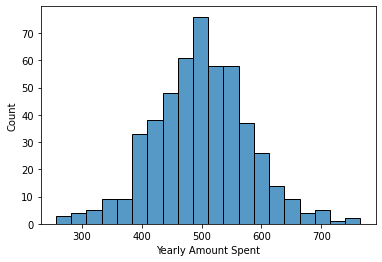

In [ ]:
sns.histplot(y)


In [ ]:
y.mean()

# The target variable, length of membership looks like it is normally distributed around the mean of 3.53

499.3140382585909

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

In [ ]:
x.columns[1]

'Time on App'

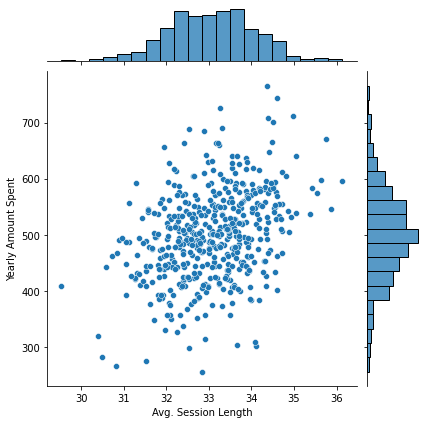

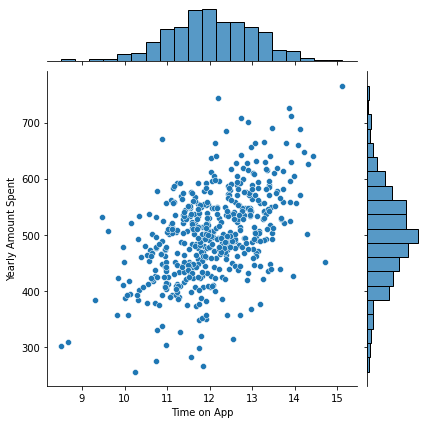

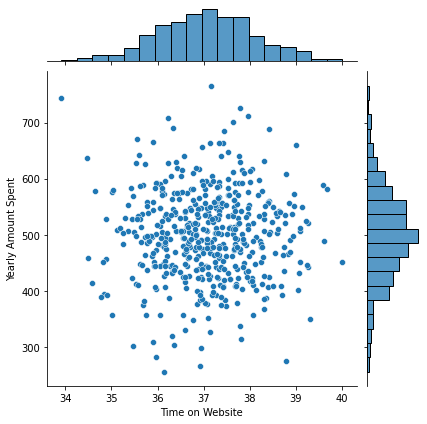

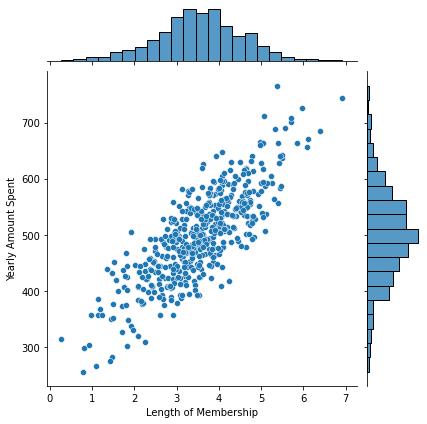

In [ ]:
#PUT YOUR CODE HERE

for i in x.columns:
  sns.jointplot(x=x[i], y=y)
  



In [ ]:
# The most important variable in determining the length of membership is the yearly amount spent.
# You can see that there is a strong positive correlation

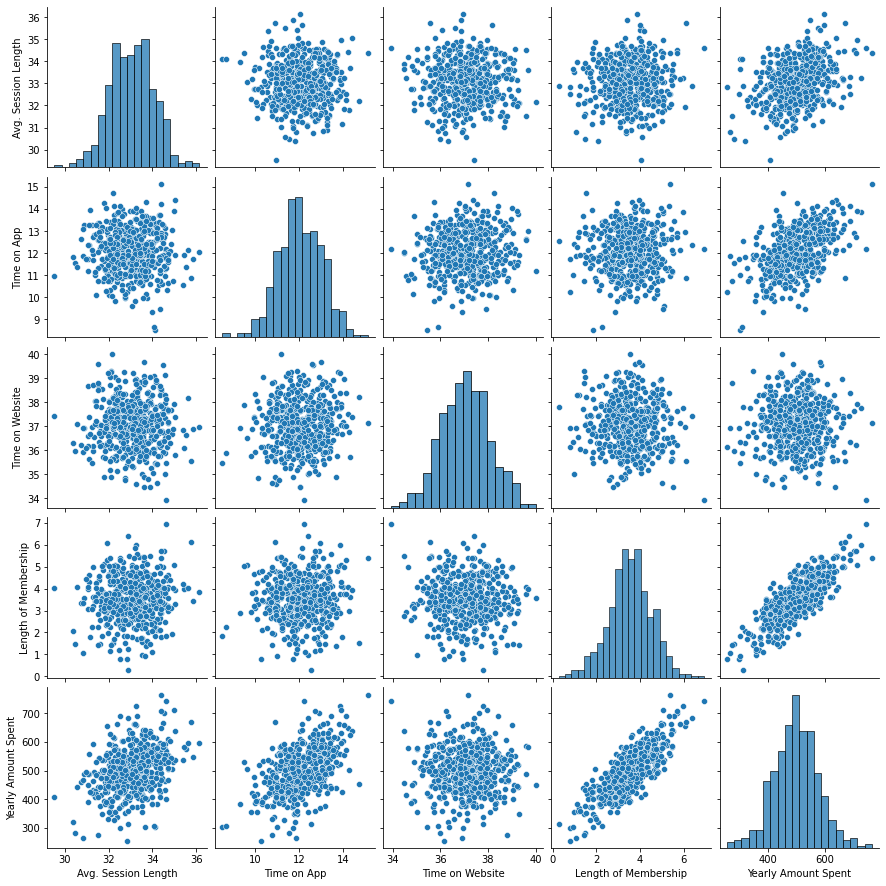

In [ ]:
sns.pairplot(customers)

In [ ]:
# From observinf the pairplot above we can see that there is not a lot of multi-collinearity in our independent variables
# The is some multi-collinearity with yearly amount spent amongst other variables such as time on app & avg session length 

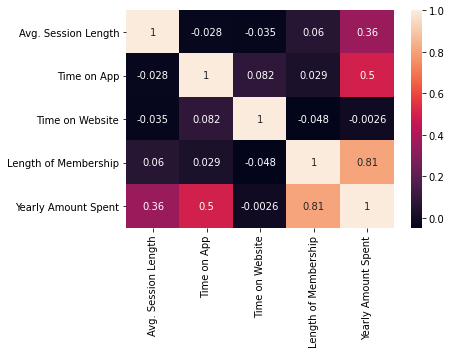

In [ ]:
sns.heatmap(customers.corr(), annot=True)

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [ ]:
# The variable yearly amount spent has the highest correlation with length of membership, so I will use this for my simple linear model 

x_linear = x[['Length of Membership']]
x_linear


,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308
...,...
495,3.746573
496,3.576526
497,4.958264
498,2.336485


In [ ]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [ ]:
#PUT YOUR CODE HERE

# Prepare data for training
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_linear, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(400, 1)
(100, 1)
(400,)
(100,)


### Training of the model

In [ ]:
#PUT YOUR CODE HERE

from sklearn.linear_model import LinearRegression

lin_regr = LinearRegression()
lin_model = lin_regr.fit(x_train, y_train)


#### Print the coeficients of the model

In [ ]:
#PUT YOUR CODE HERE

print("Coefficients")
for i in range(len(x_linear.columns)):
  print(f"{x_linear.columns[i]}: {lin_model.coef_[i]}")

# This implies that for every 1 unit increase in the Length Of Membership(years) the length yearly amount spent increases by 64 dollars.

Coefficients
Length of Membership: 64.64010065386708


In [ ]:
lin_model.intercept_

271.3521128033932

### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

Text(0.5, 1.0, 'Length Of Membership Vs Yearly Amount Spent(Training Set)')

Text(0, 0.5, 'Yearly Amount Spent')

Text(0.5, 0, 'Length Of Membership')

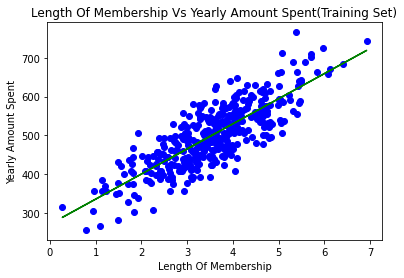

In [ ]:
#PUT YOUR CODE HERE

plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lin_model.predict(x_train), color='green')
plt.title("Length Of Membership Vs Yearly Amount Spent(Training Set)")
plt.ylabel("Yearly Amount Spent")
plt.xlabel("Length Of Membership")
plt.show()

# Here we can visually see that our linear model is fitting the data quite accurately

### Evaluate the model on the test set
Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

Text(0.5, 1.0, 'Y_Train Vs Y_Predicted')

Text(0.5, 0, 'Y_Train')

Text(0, 0.5, 'Y_Predicted')

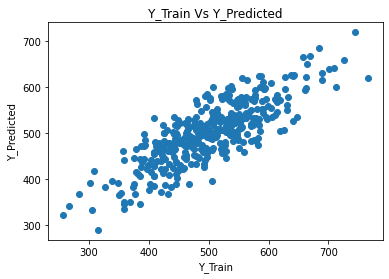

In [ ]:
#PUT YOUR CODE HERE

y_pred_train = lin_model.predict(x_train)
plt.scatter(y_train, y_pred_train)
plt.title("Y_Train Vs Y_Predicted")
plt.xlabel("Y_Train")
plt.ylabel("Y_Predicted")
plt.show()

Text(0.5, 1.0, 'Y_Test Vs Y_Predicted')

Text(0.5, 0, 'Y_Test')

Text(0, 0.5, 'Y_Predicted')

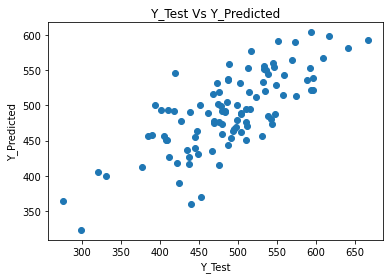

In [ ]:
#PUT YOUR CODE HERE

y_pred_test = lin_model.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.title("Y_Test Vs Y_Predicted")
plt.xlabel("Y_Test")
plt.ylabel("Y_Predicted")
plt.show()

Text(0.5, 1.0, 'Residuals')

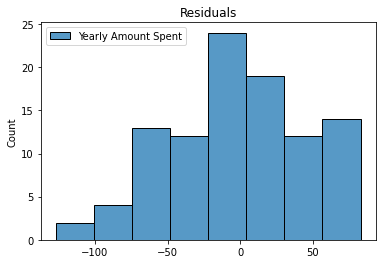

In [ ]:
residuals = pd.DataFrame((y_test-y_pred_test))
residuals = residuals.rename(columns={"Length of Membership":"Residuals"})
sns.histplot(residuals)
plt.title("Residuals")

# Remember the residual is the difference between actual value and predicted value.
# Residuals are normally distributed. If you have normally distributed residuals, it means your model is a correct choice for the data.

# Our residuals appear to be skewed to the right

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Model performance with the training set")
print("R-Squared", r2_score(y_train, y_pred_train))
print("MAE", mean_absolute_error(y_train, y_pred_train))
print("MSE", mean_squared_error(y_train, y_pred_train))
print("RMSE", np.sqrt(mean_squared_error(y_train, y_pred_train)))

Model performance with the training set
R-Squared 0.6698451495121833
MAE 37.326107702427855
MSE 2170.445239710518
RMSE 46.588037517269576


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Model performance with the test set")
print("R-Squared", r2_score(y_test, y_pred_test))
print("MAE", mean_absolute_error(y_test, y_pred_test))
print("MSE", mean_squared_error(y_test, y_pred_test))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# R-squared is 0.55 so our model is relatively good at explaining the data, however it would probably be better with a multivariate model

Model performance with the test set
R-Squared 0.5633624502240145
MAE 37.83623390033242
MSE 2162.1116327764244
RMSE 46.49851215658867


## Multivariate Model

In [ ]:
# Prepare data for training

customers.head()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [ ]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [ ]:
print("x_shape", x.shape)
print("y_shape", y.shape)

x_shape (500, 4)
y_shape (500,)


### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [ ]:
#PUT YOUR CODE HERE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)



x_train (400, 4)
y_train (400,)
x_test (100, 4)
y_test (100,)


### Training of the model

In [ ]:
#PUT YOUR CODE HERE

multi_regr = LinearRegression()
multi_regr = multi_regr.fit(x_train, y_train)


#### Print the coeficients of the model

In [ ]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [ ]:
multi_regr.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

In [ ]:
#PUT YOUR CODE HERE

print("Multi-variate Coefficients")

for i in range(len(x.columns)):
  print(f"{x.columns[i]}: {multi_regr.coef_[i]}")


Multi-variate Coefficients
Avg. Session Length: 25.596259100436132
Time on App: 38.78534598480308
Time on Website: 0.3103859328014149
Length of Membership: 61.89682859174153


### Evaluate the model on the test set

Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

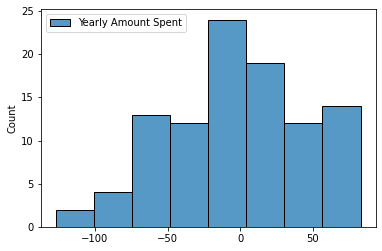

In [ ]:
# Residuals are normally distributed around zero

multi_residuals = pd.DataFrame((y_test-y_pred_test))
multi_residuals = multi_residuals.rename({'Length of Membership':'Residuals'})
sns.histplot(multi_residuals)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_pred_test.shape

(100,)

Text(0.5, 1.0, 'Y_Train Vs Y_Predicted')

Text(0.5, 0, 'Y_Train')

Text(0, 0.5, 'Y_Predicted')

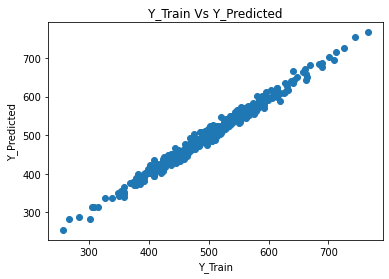

In [ ]:
y_pred_train = multi_regr.predict(x_train)
plt.scatter(y_train, y_pred_train)
plt.title("Y_Train Vs Y_Predicted")
plt.xlabel("Y_Train")
plt.ylabel("Y_Predicted")
plt.show()

Text(0.5, 1.0, 'Y_Test Vs Y_Predicted')

Text(0.5, 0, 'Y_Test')

Text(0, 0.5, 'Y_Predicted')

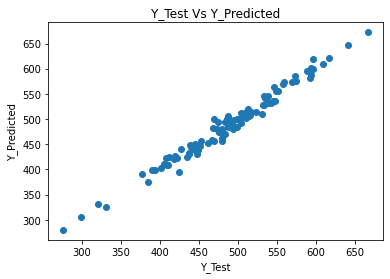

In [ ]:
y_pred_test = multi_regr.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.title("Y_Test Vs Y_Predicted")
plt.xlabel("Y_Test")
plt.ylabel("Y_Predicted")
plt.show()

#### Evalution Metrics

In [ ]:
#PUT YOUR CODE HERE

print("Model performance with the training set")
print("R-Squared", r2_score(y_train, y_pred_train))
print("MAE", mean_absolute_error(y_train, y_pred_train))
print("MSE", mean_squared_error(y_train, y_pred_train))
print("RMSE", np.sqrt(mean_squared_error(y_train, y_pred_train)))



Model performance with the training set
R-Squared 0.9854240629700333
MAE 7.727000731099083
MSE 95.82253022867256
RMSE 9.788898315370968


In [ ]:
print("Model performance with the test set")
print("R-Squared", r2_score(y_test, y_pred_test))
print("MAE", mean_absolute_error(y_test, y_pred_test))
print("MSE", mean_squared_error(y_test, y_pred_test))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# We can see that the r-squaerd score has risen to 96% using the multi-variate model for the test set, so it is much better at explaining the data
# Furthermore, our errors for MAE, MSE and RMSE have largely reduced

Model performance with the test set
R-Squared 0.9778130629184125
MAE 8.558441885315245
MSE 109.86374118394055
RMSE 10.481590584636502


#### Which model has better performance?

**Write your answer here:**

The multi-variate model has a much higher performance. It is very good at generalizing the data and thus gives accurate predictions when using the test data.

The r-squared is very high at 97.7% meaning it fits the data very well.
The error metrics are also relatively low for mae, ,se and rmse meaning the the differences between y_predicted and y_true are quite small, this are model is performing well.





**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

**Write your answer here:**

The coefficients of the multivariate model are:

Avg. Session Length: 25.59
Time on App: 38.78
Time on Website: 0.31
Length of Membership: 61.89


It's clear to me that the e-commerce company should focus their resources imprvoving the application experience rather then the website, as a 1 unit increase in time on website leads to a .31 increase in the yearly amount speant, where as, a one unit increase in the time spent on the app leads to a 38.78 increase in the yearly amount spent.

Thus, the time spent on the app is much more significant in determining the yearly amount spent then the time spent on the website.


